In [4]:
voc_data <- read.csv("data//vocalization_f.csv")
voc_data

Animal,Taxonomy,min,max
<fct>,<fct>,<int>,<int>
Blue whale,Baleen whale,12,400
Fin whale,Baleen whale,14,118
Sei whale,Baleen whale,21,3000
Common minke whale,Baleen whale,50,9400
Humpback whale,Baleen whale,30,10000
Southern right whale,Baleen whale,30,2200
Arnoux's beaked whale,Toothed whale,1000,8500
Orca,Toothed whale,1500,18000
Long-finned pilot whale,Toothed whale,1000,8000


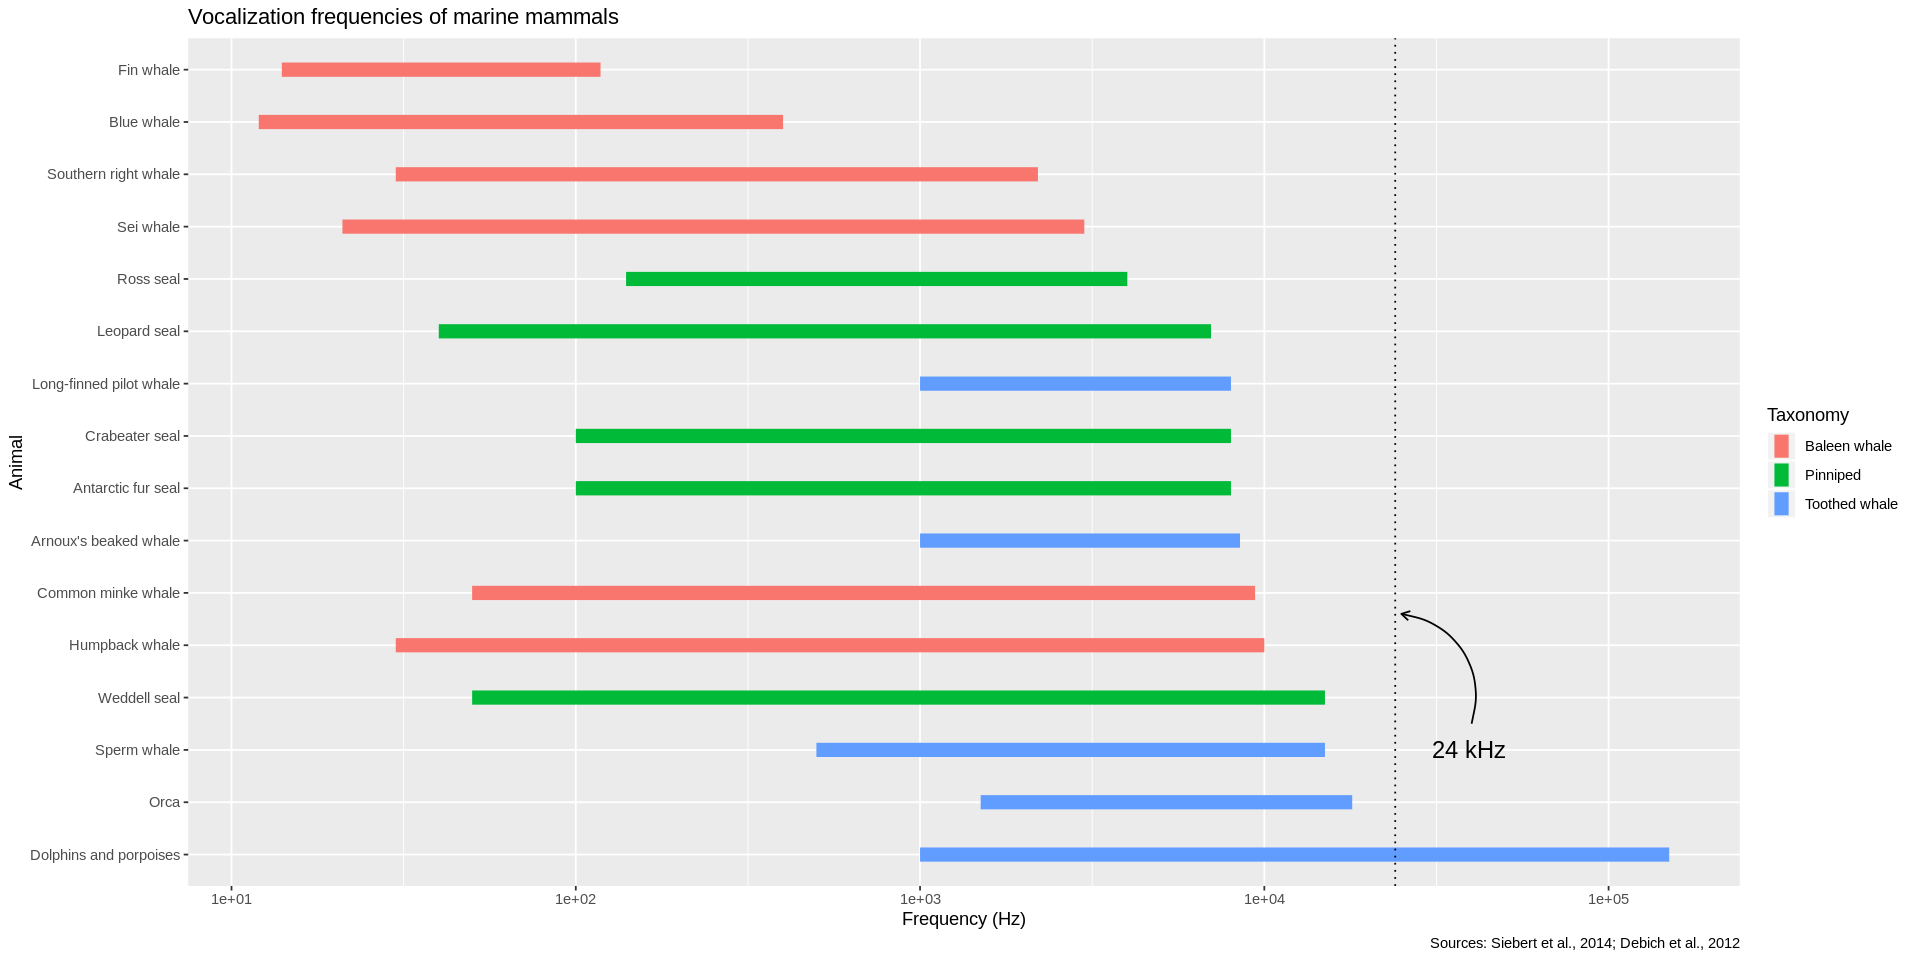

In [15]:
# plot ranges
library(ggplot2)
library(repr)

options(repr.plot.width=16, repr.plot.height=8)

voc_plot <- ggplot(voc_data, aes(x=reorder(Animal, -max), ymin = min, ymax = max, color = Taxonomy)) +
    geom_linerange(size = 4) + 
    scale_y_log10() +
    labs(
        title = "Vocalization frequencies of marine mammals", 
        x="Animal",
        y="Frequency (Hz)", 
        caption="Sources: Siebert et al., 2014; Debich et al., 2012") +
    coord_flip()

voc_annotated_plot <- voc_plot + 
    geom_hline(yintercept = 24000, linetype=3) + # coords are flipped
    annotate("text", x=3, y=24000, label="24 kHz", hjust=-0.5, size=5) +
    annotate("curve", 
             x=3.5, y=40000, xend=5.6, yend=25000, 
             arrow=arrow(length=unit(0.2, "cm")))
    
#png("images/voc_ranges.png", width=1280, height=640, res=120)
voc_annotated_plot
#dev.off()